In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/i_datasets/browser_rankings_data.csv", skiprows=1)
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [4]:
# cleaning descriptions
import string
import re
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
def tokenize(text):
    split=re.split("\W+",text) 
    return split

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
import nltk
nltk.download('popular')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [7]:
def remove_stopwords(text):
    text=[word.lower() for word in text if word.lower() not in stopword]
    return text

In [8]:
df['Short Description tokenized'] = df['Short Description'].apply(lambda x: remove_punctuation(x))
df['Short Description tokenized'] = df['Short Description tokenized'].apply(lambda x: tokenize(x))
df['Short Description tokenized'] = df['Short Description tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Short Description tokenized
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...","[small, fastest, secure, web, browser, best, m..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...","[fast, simple, secure, google, chrome, browser..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...","[fast, safe, web, browser, free, vpn, ad, bloc..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...","[fast, safe, web, browser, free, vpn, ad, bloc..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,"[puffin, tv, browser, one, app, watch, videos,..."


In [9]:
df['Long Description tokenized'] = df['Long Description'].apply(lambda x: remove_punctuation(x))
df['Long Description tokenized'] = df['Long Description tokenized'].apply(lambda x: tokenize(x))
df['Long Description tokenized'] = df['Long Description tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Short Description tokenized,Long Description tokenized
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...","[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...","[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...","[fast, safe, web, browser, free, vpn, ad, bloc...","[opera, fast, safe, web, browser, android, dev..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,"[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
 10  Short Description tokenized      3066 non-null   object 
 11  Long Description tokenized       3066 non-null   object 
dtypes: float64(1), int64

In [11]:
# max len of short desc tokens list for each browser
print(max([len(x) for x in list(df['Short Description tokenized'].values)]))
# min len of short desc tokens list for each browser
print(min([len(x) for x in list(df['Short Description tokenized'].values)]))
# max len of long desc tokens list for each browser
print(max([len(x) for x in list(df['Long Description tokenized'].values)]))
# min len of long desc tokens list for each browser
print(min([len(x) for x in list(df['Long Description tokenized'].values)]))

13
8
383
119


In [12]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [13]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Short Description tokenized,Long Description tokenized
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...","[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...","[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...","[fast, safe, web, browser, free, vpn, ad, bloc...","[opera, fast, safe, web, browser, android, dev..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,"[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin..."


In [14]:
df_temp_1 = df[['Rank', 'Short Description tokenized', 'Long Description tokenized']].copy()
df_temp_1.head()

,Rank,Short Description tokenized,Long Description tokenized
0,2.0,"[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,..."
1,3.0,"[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,..."
2,4.0,"[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver..."
3,4.0,"[fast, safe, web, browser, free, vpn, ad, bloc...","[opera, fast, safe, web, browser, android, dev..."
4,1.0,"[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin..."


In [15]:
df_temp_1 = df_temp_1.groupby('Rank').agg(lambda x: x.tolist())
df_temp_1.head()

,Short Description tokenized,Long Description tokenized
Rank,,
1.0,"[[puffin, tv, browser, one, app, watch, videos...","[[puffin, tv, browser, special, edition, puffi..."
2.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser..."
3.0,"[[fast, simple, secure, google, chrome, browse...","[[google, chrome, fast, easy, use, secure, web..."
4.0,"[[fast, safe, web, browser, free, vpn, ad, blo...","[[fast, safe, private, introducing, latest, ve..."
5.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser..."


In [16]:
len(df_temp_1)

119

In [17]:
from collections import Counter
import itertools
def flatten(regular_list):
    flat_list = list(itertools.chain(*regular_list))
    return flat_list
df_temp_1["flat_s_tokens"] = df_temp_1['Short Description tokenized'].apply(lambda x: flatten(x))
df_temp_1["flat_l_tokens"] = df_temp_1['Long Description tokenized'].apply(lambda x: flatten(x))
df_temp_1.head()

,Short Description tokenized,Long Description tokenized,flat_s_tokens,flat_l_tokens
Rank,,,,
1.0,"[[puffin, tv, browser, one, app, watch, videos...","[[puffin, tv, browser, special, edition, puffi...","[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin..."
2.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,..."
3.0,"[[fast, simple, secure, google, chrome, browse...","[[google, chrome, fast, easy, use, secure, web...","[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,..."
4.0,"[[fast, safe, web, browser, free, vpn, ad, blo...","[[fast, safe, private, introducing, latest, ve...","[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver..."
5.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,..."


In [18]:
def get_top_k_keywords(list_tokens, k):
    c = Counter(list_tokens)
    top_k = c.most_common(k)
    top_k_tokens = [x[0] for x in top_k]
    return top_k_tokens

In [19]:
df_temp_1["top_10_stokens"] = df_temp_1['flat_s_tokens'].apply(lambda x: get_top_k_keywords(x, 10))
df_temp_1["top_10_ltokens"] = df_temp_1['flat_l_tokens'].apply(lambda x: get_top_k_keywords(x, 10))
df_temp_1.head()

,Short Description tokenized,Long Description tokenized,flat_s_tokens,flat_l_tokens,top_10_stokens,top_10_ltokens
Rank,,,,,,
1.0,"[[puffin, tv, browser, one, app, watch, videos...","[[puffin, tv, browser, special, edition, puffi...","[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin...","[web, search, ad, browse, privately, anonymous...","[privacy, data, search, browser, online, brows..."
2.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,...","[browser, web, safe, free, blocker, amp, searc...","[browser, private, web, free, brave, tv, puffi..."
3.0,"[[fast, simple, secure, google, chrome, browse...","[[google, chrome, fast, easy, use, secure, web...","[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,...","[browser, web, safe, free, blocker, amp, puffi...","[browser, private, web, free, browsing, tv, pu..."
4.0,"[[fast, safe, web, browser, free, vpn, ad, blo...","[[fast, safe, private, introducing, latest, ve...","[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver...","[browser, web, safe, free, blocker, amp, puffi...","[browser, web, private, tv, puffin, free, andr..."
5.0,"[[small, fastest, secure, web, browser, best, ...","[[one, smallest, fastest, secure, web, browser...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,...","[browser, web, safe, free, blocker, amp, ad, f...","[browser, private, web, opera, browsing, priva..."


In [20]:
flat_s_tokens = list(df_temp_1['flat_s_tokens'])
flat_l_tokens = list(df_temp_1['flat_l_tokens'])

In [21]:
def jacc_corr(list_c):
    j_temp_s = []
    for i in list_c:
        temp_s = []
        for j in list_c:
            temp_s.append(1-jaccard_similarity(i, j))
        j_temp_s.append(temp_s)
    corr_r = np.array(j_temp_s)
    return corr_r

In [22]:
corr_sr = jacc_corr(flat_s_tokens)
corr_lr = jacc_corr(flat_l_tokens)

### Question 3.1 correlation between short description, long description, Rank

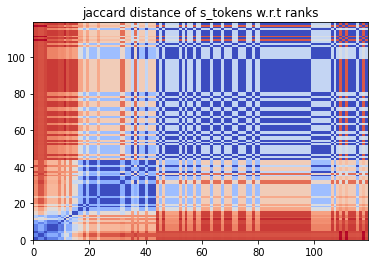

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pcolormesh( corr_sr, cmap = 'coolwarm')
plt.title( "jaccard distance of s_tokens w.r.t ranks" )
plt.show()

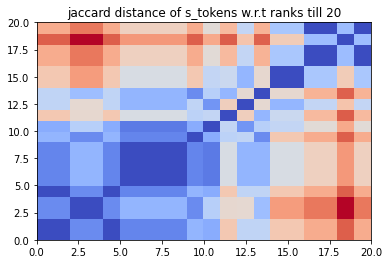

In [24]:
plt.pcolormesh( corr_sr[:20, :20], cmap = 'coolwarm')
plt.title( "jaccard distance of s_tokens w.r.t ranks till 20" ) ### zooming to 20 rankings
plt.show()

In [25]:
### here we can see that there is some kind of correlation between short description and rankings (for every 12-14 ranks)

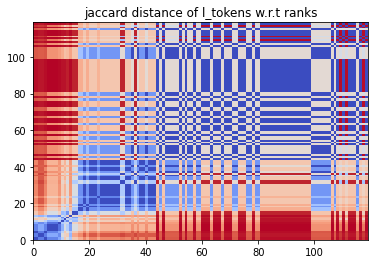

In [26]:
plt.pcolormesh( corr_lr, cmap = 'coolwarm')
plt.title( "jaccard distance of l_tokens w.r.t ranks" )
plt.show()

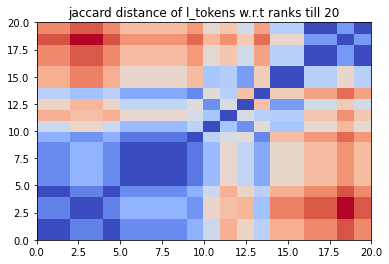

In [27]:
plt.pcolormesh( corr_lr[:20, :20], cmap = 'coolwarm')
plt.title( "jaccard distance of l_tokens w.r.t ranks till 20" ) ### zooming to 20 rankings
plt.show()

In [28]:
### here we can see that there is some kind of correlation between long description and rankings (for every 10-11 ranks)

In [29]:
def get_keyword_pos(text, key_w):
    indices = list([i for i, s in enumerate(text) if key_w in s])
    if len(indices)>0:
        return indices[0]
    else:
        return 'keyword not present'
df["keyword_pos"] = df.apply(lambda x: get_keyword_pos(x['Short Description tokenized'], x['Keyword'] ), axis=1)
df["keyword_pos"]

0                         4
1                         5
2                         3
3                         3
4                         2
               ...         
3061    keyword not present
3062    keyword not present
3063    keyword not present
3064    keyword not present
3065    keyword not present
Name: keyword_pos, Length: 3066, dtype: object

In [30]:
# ranks of browsers in which keyword is not present
kn_ranks = df[df['keyword_pos']=='keyword not present']['Rank'].values

In [31]:
max(kn_ranks)

134.0

In [32]:

min(kn_ranks)

1.0

In [33]:
def convert_categorical(x):
    if type(x) != str:
        if x<10:
            c = 1
        else:
            c = 0
    else:
        c = 0
    return c

In [34]:
# put 1 if keyword is in first 10 words otherwise 0
df["keyword_in_top10"] = df["keyword_pos"].apply(lambda x: convert_categorical(x))
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,Short Description tokenized,Long Description tokenized,keyword_pos,keyword_in_top10
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...","[small, fastest, secure, web, browser, best, m...","[one, smallest, fastest, secure, web, browser,...",4,1
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...","[fast, simple, secure, google, chrome, browser...","[google, chrome, fast, easy, use, secure, web,...",5,1
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...","[fast, safe, web, browser, free, vpn, ad, bloc...","[fast, safe, private, introducing, latest, ver...",3,1
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...","[fast, safe, web, browser, free, vpn, ad, bloc...","[opera, fast, safe, web, browser, android, dev...",3,1
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,"[puffin, tv, browser, one, app, watch, videos,...","[puffin, tv, browser, special, edition, puffin...",2,1


In [35]:
df["keyword_in_top10"] = pd.Categorical(df["keyword_in_top10"])

### correlation between Rank, Keyword placement

In [36]:
df['Rank'].corr(df["keyword_in_top10"])

-0.23218075512747788

####Observation: The correlation between rankings and keyword placement in the first 10 words is -0.232(weak negative correlation), this implies there is a some evidence that using a keyword in the first 10 words weakly affects the ranking

In [37]:
df_temp_2 = df[['Rank', 'App ID']].copy()
df_temp_2.head()
#df_temp_1.groupby('Rank').agg(lambda x: x.tolist())

,Rank,App ID
0,2.0,net.fast.web.browser
1,3.0,com.android.chrome
2,4.0,com.opera.browser
3,4.0,com.opera.browser
4,1.0,com.cloudmosa.puffinTV


In [38]:
def split_str(x):
    ls = x.split('.')
    return ls

In [39]:
df_temp_2['App ID tokenized'] = df_temp_2['App ID'].apply(lambda x: split_str(x))
df_temp_2.head()

,Rank,App ID,App ID tokenized
0,2.0,net.fast.web.browser,"[net, fast, web, browser]"
1,3.0,com.android.chrome,"[com, android, chrome]"
2,4.0,com.opera.browser,"[com, opera, browser]"
3,4.0,com.opera.browser,"[com, opera, browser]"
4,1.0,com.cloudmosa.puffinTV,"[com, cloudmosa, puffinTV]"


In [40]:
df_temp_2 = df_temp_2.groupby('Rank').agg(lambda x: x.tolist())

In [41]:
df_temp_2.head()

,App ID,App ID tokenized
Rank,,
1.0,"[com.cloudmosa.puffinTV, com.cloudmosa.puffinT...","[[com, cloudmosa, puffinTV], [com, cloudmosa, ..."
2.0,"[net.fast.web.browser, com.cloudmosa.puffinTV,...","[[net, fast, web, browser], [com, cloudmosa, p..."
3.0,"[com.android.chrome, com.cloudmosa.puffinTV, c...","[[com, android, chrome], [com, cloudmosa, puff..."
4.0,"[com.opera.browser, com.opera.browser, com.ope...","[[com, opera, browser], [com, opera, browser],..."
5.0,"[net.fast.web.browser, net.fast.web.browser, c...","[[net, fast, web, browser], [net, fast, web, b..."


##### To measure the correlation between ranking and App ID, we consider the uniques of the App ID i.e, counting num of unique tokens in each rank as a measure

In [42]:
df_temp_2['unique_idTokens_num'] = df_temp_2['App ID tokenized'].apply(lambda x: len(set(flatten(x))))
df_temp_2.head()

,App ID,App ID tokenized,unique_idTokens_num
Rank,,,
1.0,"[com.cloudmosa.puffinTV, com.cloudmosa.puffinT...","[[com, cloudmosa, puffinTV], [com, cloudmosa, ...",13
2.0,"[net.fast.web.browser, com.cloudmosa.puffinTV,...","[[net, fast, web, browser], [com, cloudmosa, p...",13
3.0,"[com.android.chrome, com.cloudmosa.puffinTV, c...","[[com, android, chrome], [com, cloudmosa, puff...",11
4.0,"[com.opera.browser, com.opera.browser, com.ope...","[[com, opera, browser], [com, opera, browser],...",11
5.0,"[net.fast.web.browser, net.fast.web.browser, c...","[[net, fast, web, browser], [net, fast, web, b...",13


In [43]:
df_temp_2['Rank'] = df_temp_2.index

In [44]:
df_temp_2['Rank'].corr(df_temp_2['unique_idTokens_num'])

-0.8134996005808841

#### observation: The correlation between rankings and unique tokens of App IDs in each rank is -0.813(strong negative correlation). This shows that browsers with more unique App IDs have better ranking